In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
data = pd.read_csv("Aufnahme_Tennismatch_3Games_transformiert.csv")
data.head()

,Frame,Object.ID,Transformed.X,Transformed.Y,Speed
0,0,0,1.640339,-12.056091,0.987358
1,1,0,1.640843,-12.053270,0.479844
2,2,0,1.640531,-12.051376,0.229737
3,3,0,1.638165,-12.051634,0.100341
4,4,0,1.632475,-12.053030,0.164888


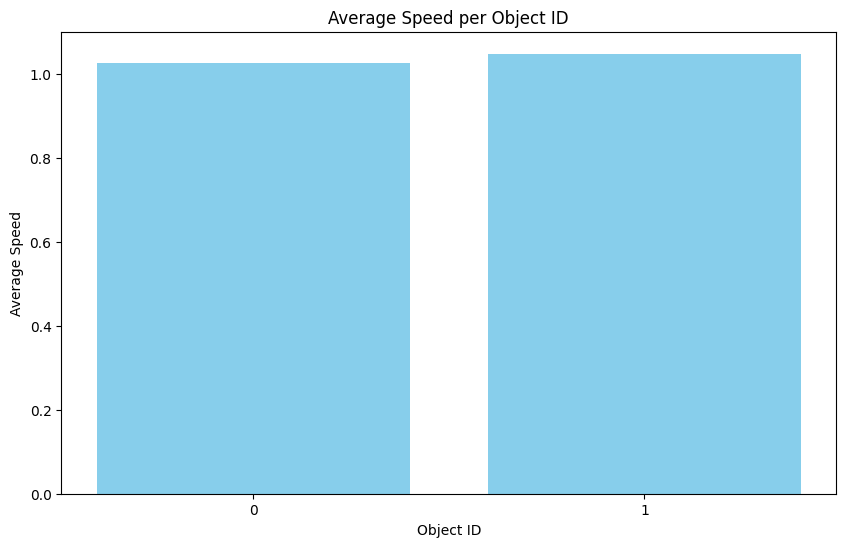

In [9]:
# durchschnittliche Geschwindigkeit
# Berechnung der Geschwindigkeit in jedem Frame


# Durchschnittliche Geschwindigkeit pro Objekt-ID berechnen
average_speed_per_object = data.groupby('Object.ID')['Speed'].mean().reset_index()

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.bar(average_speed_per_object['Object.ID'], average_speed_per_object['Speed'], color='skyblue')
plt.xlabel('Object ID')
plt.ylabel('Average Speed')
plt.title('Average Speed per Object ID')
plt.xticks(average_speed_per_object['Object.ID'])
plt.show()

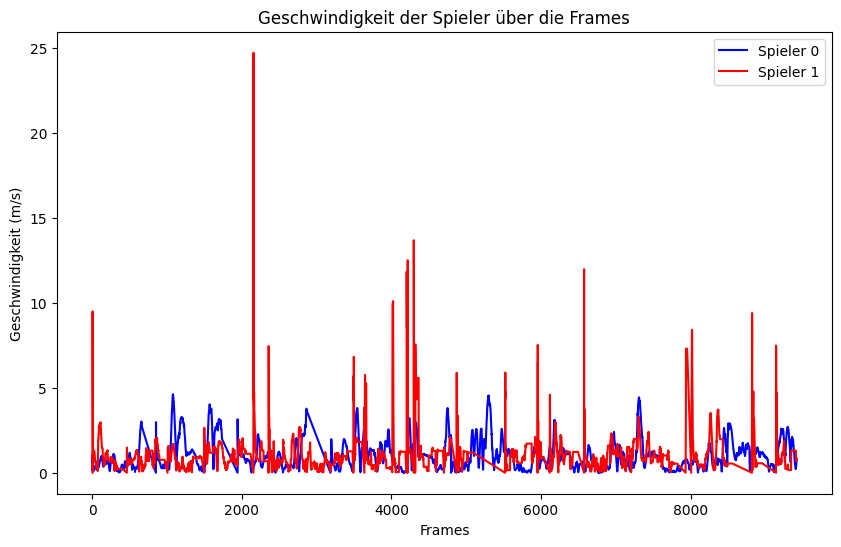

In [12]:
import matplotlib.pyplot as plt

# Erstellen einer neuen Grafik
plt.figure(figsize=(10, 6))

# Daten für den ersten Spieler (blau)
player1 = data[data['Object.ID'] == 0]  # Spieler mit Object.ID == 1
plt.plot(player1['Frame'], player1['Speed'], color='blue', label='Spieler 0')

# Daten für den zweiten Spieler (rot)
player2 = data[data['Object.ID'] == 1]  # Spieler mit Object.ID == 2
plt.plot(player2['Frame'], player2['Speed'], color='red', label='Spieler 1')

# Achsenbeschriftungen und Titel
plt.xlabel('Frames')
plt.ylabel('Geschwindigkeit (m/s)')
plt.title('Geschwindigkeit der Spieler über die Frames')

# Legende hinzufügen
plt.legend()

# Grafik anzeigen
plt.show()

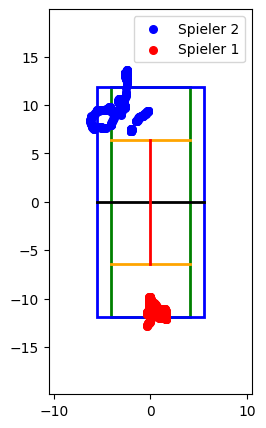

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Tennisfeldabmessungen (in Metern)
length = 23.77  # Länge des Tennisfelds
width = 8.23    # Breite des Tennisfelds für Einzel
double_width = 10.97  # Breite des Tennisfelds für Doppel
service_line_dist = 6.40  # Abstand der Aufschlaglinie vom Netz
net_position = 0  # Das Netz ist in der Mitte (Y = 0)

# Zusätzlicher Platz um das Feld (3 Meter)
extra_space = 0

# Erstellen der Grafik
fig, ax = plt.subplots(figsize=(10, 5))

# Tennisfeld (Grundlinien und Seitenlinien für Einzel)
ax.add_patch(patches.Rectangle((-width / 2 - extra_space, -length / 2 - extra_space),
                                width + 2 * extra_space, length + 2 * extra_space,
                                fill=False, edgecolor="green", lw=2))

# Seitenlinien für Doppel (außerhalb des Einzelfelds)
ax.add_patch(patches.Rectangle((-double_width / 2 - extra_space, -length / 2 - extra_space),
                                double_width + 2 * extra_space, length + 2 * extra_space,
                                fill=False, edgecolor="blue", lw=2))

# Netz
plt.plot([-double_width / 2 - extra_space, double_width / 2 + extra_space],
         [net_position, net_position], color='black', lw=2)

# Aufschlaglinien
plt.plot([-width / 2 - extra_space, width / 2 + extra_space],
         [service_line_dist, service_line_dist], color='orange', lw=2)
plt.plot([-width / 2 - extra_space, width / 2 + extra_space],
         [-service_line_dist, -service_line_dist], color='orange', lw=2)

# Mittellinie
plt.plot([0, 0], [-service_line_dist, service_line_dist], color='red', lw=2)

# Positionen von Spieler 2 einzeichnen
player2_positions = data[data['Object.ID'] == 1].head(500)  # Erste 100 Punkte von Spieler 2

# Punkte plotten (X und Y korrekt)
plt.scatter(player2_positions['Transformed.X'], player2_positions['Transformed.Y'], color='blue', label='Spieler 2', s=30)


player1_positions = data[data['Object.ID'] == 0].head(500)  # Erste 100 Punkte von Spieler 2

# Punkte plotten (X und Y korrekt)
plt.scatter(player1_positions['Transformed.X'], player1_positions['Transformed.Y'], color='red', label='Spieler 1', s=30)

# Achsenanpassungen
ax.set_xlim(-double_width / 2 - extra_space - 5, double_width / 2 + extra_space + 5)  # x-Achse erweitern
ax.set_ylim(-length / 2 - extra_space - 8, length / 2 + extra_space + 8)  # y-Achse erweitern
ax.set_aspect('equal')

# Achsen ausschalten und Legende hinzufügen
plt.axis()  # Achsen anzeigen
plt.legend()
plt.show()


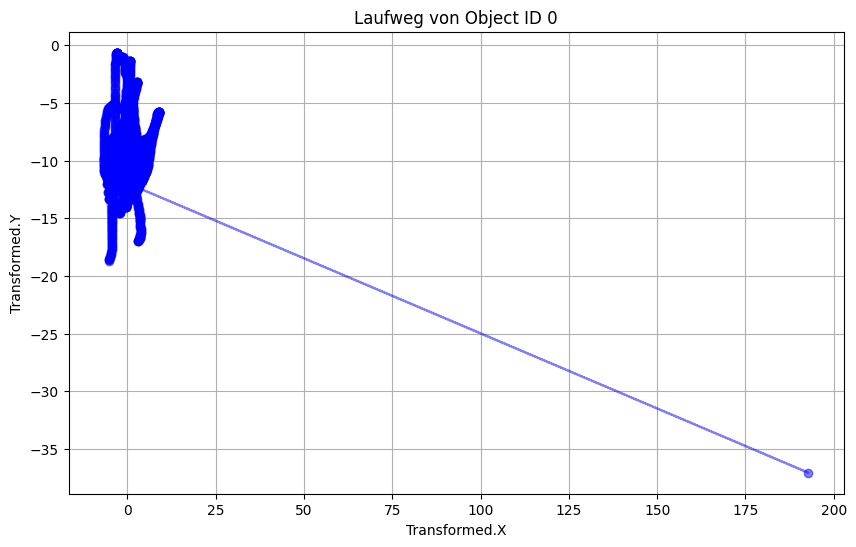

In [10]:
# Laufweg Object ID 0
# Filtern der Daten für Object ID 0
data_object_0 = data[data['Object.ID'] == 0]

# Plot des Laufwegs erstellen (Position X vs. Position Y)
plt.figure(figsize=(10, 6))
plt.plot(data_object_0['Transformed.X'], data_object_0['Transformed.Y'], marker='o', linestyle='-', color='b', alpha=0.5)
plt.xlabel('Transformed.X')
plt.ylabel('Transformed.Y')
plt.title('Laufweg von Object ID 0')
plt.grid(True)
plt.show()

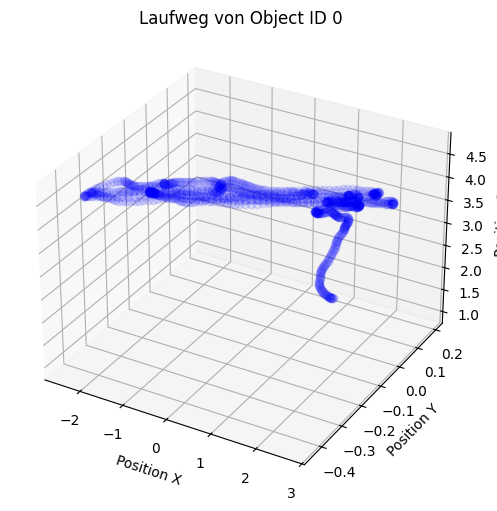

In [ ]:
# 3D Plot des Laufwegs erstellen (Position X vs. Position Y vs. Position Z)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(data_object_0['Transformed.X'], data_object_0['Position Y'], data_object_0['Position Z'], marker='o', linestyle='-', color='b', alpha=0.1)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_zlabel('Position Z')
ax.set_title('Laufweg von Object ID 0')
plt.show()

In [31]:
# Frames finden, in denen die Geschwindigkeit 0 ist
frames_with_zero_speed = data_object_0[data_object_0['Speed'] == 0]['Frame']

# Ergebnis anzeigen
print("Frames mit Geschwindigkeit 0 für Object ID 0:")
print(frames_with_zero_speed)

Frames mit Geschwindigkeit 0 für Object ID 0:
Series([], Name: Frame, dtype: int64)


In [32]:
data_object_0.head()

,Frame,Object ID,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Bounding Box X1,Bounding Box Y1,...,Bounding Box X6,Bounding Box Y6,Bounding Box Z6,Bounding Box X7,Bounding Box Y7,Bounding Box Z7,Bounding Box X8,Bounding Box Y8,Bounding Box Z8,Speed
0,0,0,0.706526,0.191217,0.817250,0.917935,0.046710,0.013686,0.450839,0.018730,...,0.429567,0.267964,1.114594,0.911712,0.292499,1.121782,0.911712,0.428258,0.658438,0.919225
4,1,0,0.709247,0.185752,0.837220,0.219175,-0.252135,0.901972,0.460774,0.000949,...,0.439348,0.253049,1.143343,0.920615,0.277550,1.150521,0.920615,0.413050,0.688017,0.961854
8,2,0,0.716185,0.180756,0.859168,0.299344,-0.213217,0.784380,0.475418,-0.003989,...,0.453818,0.251558,1.164315,0.935716,0.276063,1.171493,0.935716,0.411710,0.708376,0.866211
13,3,0,0.723535,0.175098,0.889642,0.273525,-0.227934,0.830215,0.483038,-0.012180,...,0.461163,0.247973,1.197876,0.943746,0.272531,1.205065,0.943746,0.408307,0.741269,0.903342
17,4,0,0.737780,0.168931,0.927173,0.355842,-0.240790,0.889778,0.504070,-0.020383,...,0.481901,0.244266,1.236309,0.965306,0.268902,1.243521,0.965306,0.404908,0.778933,0.988083


In [33]:
# Maximalgeschwindigkeit pro Objekt-ID
# Maximale Geschwindigkeit pro Objekt-ID berechnen
max_speed_per_object = data.groupby('Object ID')['Speed'].max().reset_index()
max_speed_per_object

,Object ID,Speed
0,0,2.354457e+00
1,1,1.634216e+00
2,2,3.192763e-01
3,3,6.814095e+00
4,4,9.277739e+00
5,5,5.911665e-06
6,6,1.139745e+00
7,7,5.014872e+00
8,8,2.953141e+00
9,9,6.197865e+00


In [37]:
# Frames mit maximaler Geschwindigkeit
frames_with_max_speed = data_object_0[data_object_0['Speed'] == max_speed_per_object['Speed'][0]]['Frame']
frames_with_max_speed

4875    932
Name: Frame, dtype: int64

/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_39168/640359845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_object_0['Position X 1'] = data_object_1['Position X'].values
/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_39168/640359845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_object_0['Position Y 1'] = data_object_1['Position Y'].values
/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_39168/640359845.py:9: SettingWithCopyWarning: 
A value is trying 

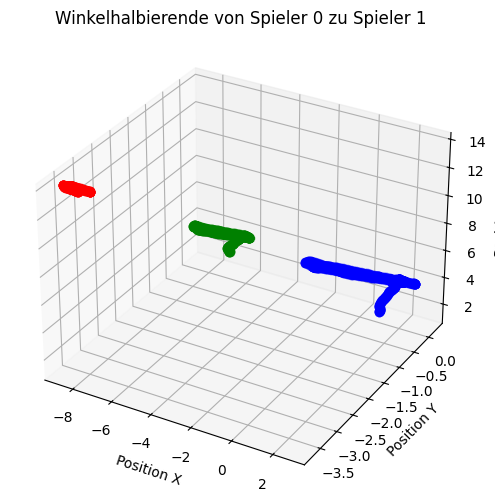

In [4]:
# Winkelhalbierende
def winkelhalbierende():